## Import modules: 

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import os
import seaborn as sns

## Function definitions: 

In [15]:



def essential_subset(df, subset_cols, subset_name):
    df_temp = df[['Rv_ID', 'gene_name']+subset_cols].copy()
    df_temp[subset_name] = df_temp.sum(numeric_only=True, axis = 1)
    
    df_temp.sort_values(by=subset_name, ascending=False, inplace=True)
    df_temp.reset_index(inplace=True, drop=True)
    df_temp = df_temp[['Rv_ID', 'gene_name', subset_name] + subset_cols]
    
    return df_temp

## Files and paths: 

In [2]:
dir_data = '../../data/standardized_data/'
dir_figs = '../../figures/Tn_mat_stats/'

Load binary dataset: 

In [33]:
tn_file = os.path.join(dir_data, 'result_bin_matrix_2019_12_10.csv')
df_tn = pd.read_csv(tn_file)
df_tn.head(2)

,Rv_ID,PE35_KO_vs_mbio_H37Rv,PPE68_KO_vs_mbio_H37Rv,Rv0950c_KO_vs_CB_WT,Rv0954_KO_vs_RJ_WT,Rv1096_KO_vs_CB_WT,Rv3005c_KO_day32_vs_dejesus_H37Rv_day32,Rv3594_KO_vs_Rubin_FLUTE_WT,Rv3684_KO_vs_CB_WT,Rv3717_KO_vs_Rubin_FLUTE_WT,...,zhang_AA_Rescue_vs_zhang_in_vitro_control_Rescue,zhang_DETA-NO_pH_7.0_vs_zhang_pH_7.0_no_NO_control,zhang_Fe_1.5mM_vs_zhang_Fe_450uM,zhang_Trp_Rescue_vs_zhang_in_vitro_control_Rescue,zhang_Tyloxapol_pH_6.5_vs_zhang_Tyloxapol_pH_4.5,zhang_Tyloxapol_pH_6.5_vs_zhang_pcit_pH_4.5,zhang_mhcii_mouse_d10_vs_zhang_wt_mouse_d10,zhang_mhcii_mouse_d45_vs_zhang_wt_mouse_d45,zhang_wt_mouse_d10_vs_zhang_input_library,zhang_wt_mouse_d45_vs_zhang_input_library
0,Rv0001,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,Rv0002,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


# Rank columns by the number of essential genes. 

In [36]:
df_tn.sum(numeric_only=True).sort_values(ascending = False).head(20)

dejesus_Rv1432_day0_vs_dejesus_H37Rv_day0            406.0
zhang_wt_mouse_d45_vs_zhang_input_library            328.0
dejesus_H37Rv_day32_vs_dejesus_H37Rv_day0            312.0
marP_KO_vs_marP_WT                                   263.0
dejesus_Rv1565c_day32_vs_dejesus_H37Rv_day32         253.0
minato_minimal_plate_vs_minato_rich_plate            222.0
ritterhaus_hypoxia_H6_vs_ritterhaus_hypoxia_input    214.0
carey_663_vs_mbio_H37Rv                              208.0
carey_621_vs_mbio_H37Rv                              204.0
xu_inh_025_vs_xu_inh_0                               180.0
dejesus_Rv1565c_day0_vs_dejesus_H37Rv_day0           178.0
carey_631_vs_mbio_H37Rv                              162.0
carey_667_vs_mbio_H37Rv                              159.0
carey_662_vs_mbio_H37Rv                              151.0
carey_632_vs_mbio_H37Rv                              148.0
dejesus_Rv2680_day32_vs_dejesus_Rv2680_day0          144.0
griffin_glycerol_vs_mbio_H37Rv                       129

Visualize: 

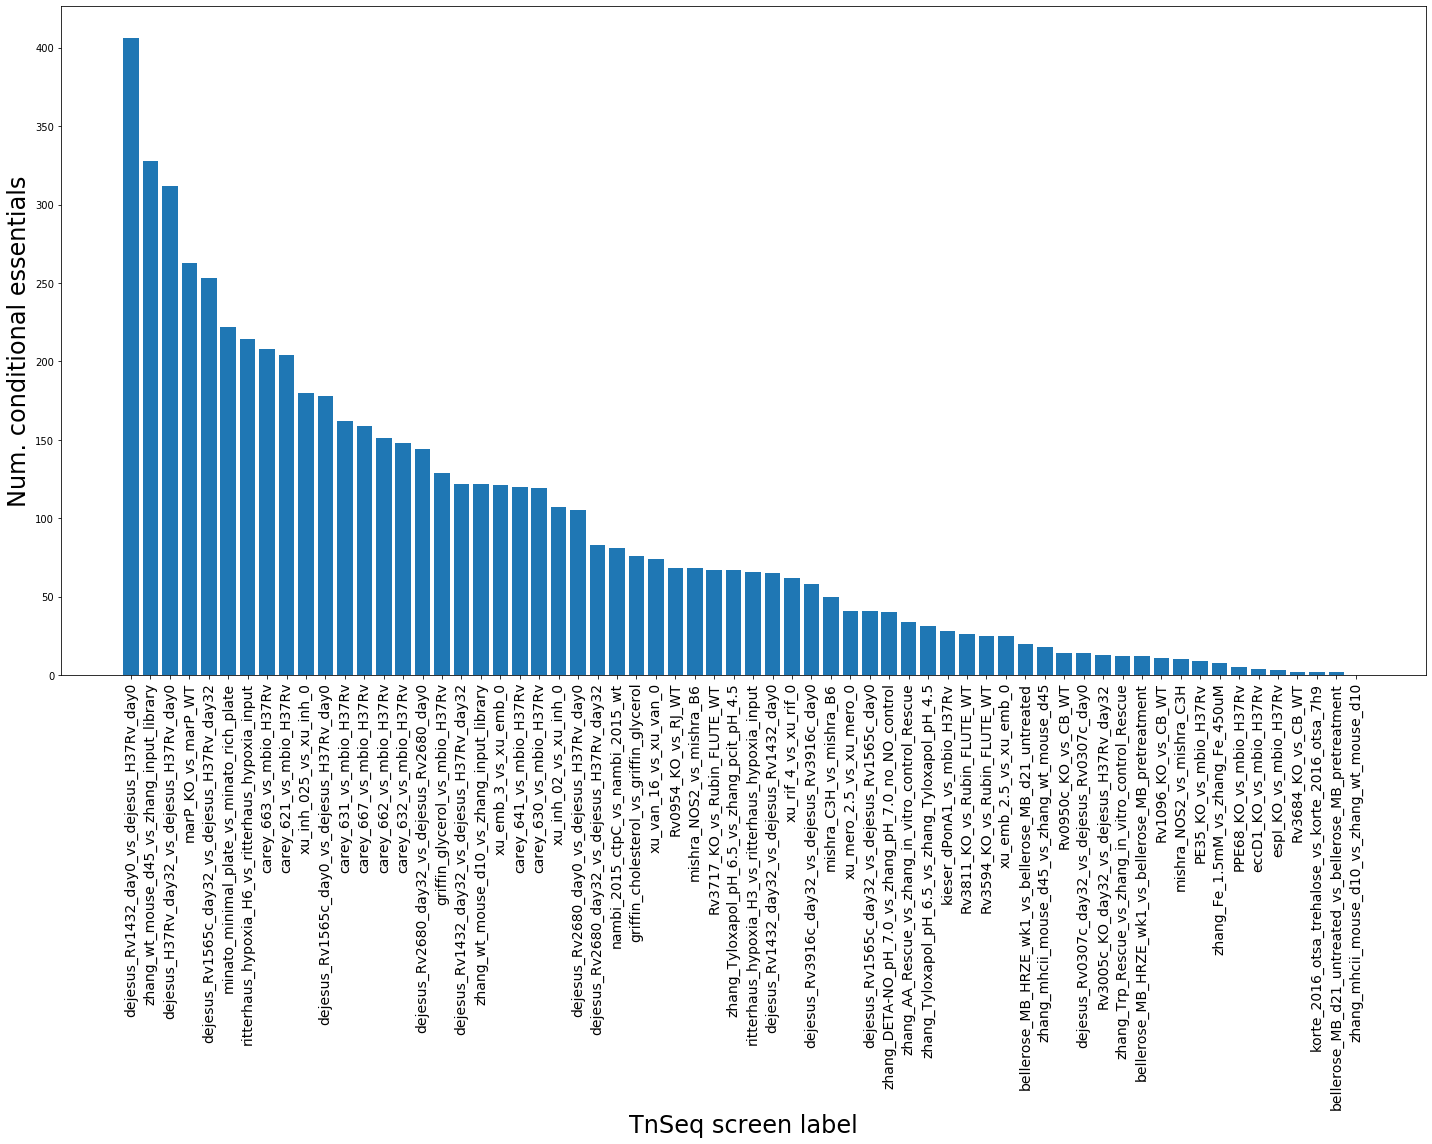

In [37]:
df_Tn_screen_stats = df_tn.sum(numeric_only=True).sort_values(ascending = False)
vals = df_Tn_screen_stats.values
labels = df_Tn_screen_stats.keys()
xvals = np.arange(len(vals))
plt.figure(figsize = (20,16))
plt.bar(xvals, vals)
plt.ylabel('Num. conditional essentials', fontsize = 24)
xt = plt.xticks(xvals, np.array(labels), rotation = 90, fontsize = 14)
plt.xlabel('TnSeq screen label', fontsize = 24)
plt.tight_layout()
file_out = os.path.join(dir_figs, 'Tn_screen_stats.png')
plt.savefig(file_out, dpi = 300)


# Rank genes by the number of times they're essential across conditions: 

In [38]:
df_tn['sum_all'] = df_tn.sum(numeric_only=True, axis = 1)

In [99]:
df_tn_top = df_tn[df_tn.sum_all > 10][['Rv_ID', 'sum_all']].sort_values(by='sum_all', ascending=False)
df_tn_top.reset_index(inplace=True, drop=True)
df_tn_top.shape

(98, 2)

### Distribution of essentiality counts across genes: 

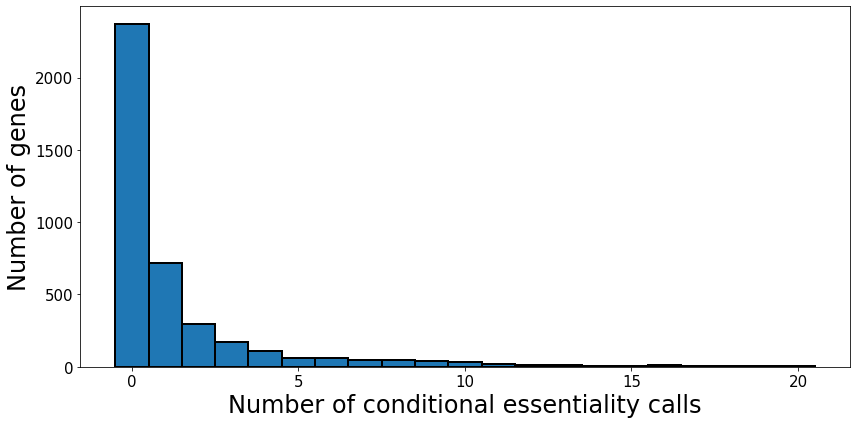

In [41]:
plt.figure(figsize = (12,6))
hist = plt.hist(df_tn['sum_all'].values, bins = np.arange(-0.5, 21), edgecolor='black', linewidth=2)

# sns.distplot(df_tn['sum_all'].values, bins = np.arange(-0.5, 21))
plt.xlabel('Number of conditional essentiality calls', fontsize = 24)
plt.ylabel('Number of genes', fontsize = 24)
plt.xticks(fontsize = 15)
yt = plt.yticks(fontsize = 15)
plt.tight_layout()
out_file = os.path.join(dir_figs, 'gene_stats.png')
plt.savefig(out_file, dpi = 300)

# Can we identify the core essentials in the 0-bin?

In [53]:
file_mbio = '../../data/SI_datasets/2017A_DeJesus_Iorger/table_1.xlsx'
df_mbio = pd.read_excel(file_mbio)
df_mbio.head(2)

,Rv_ID,Name,Description,Number of TA Sites,Number of Permissive (P) Sites,Number of Non-Permissive (NP) Sites,Number of Sites Belonging to Essential State,Number of Sites Belonging to Growth-Defect State,Number of Sites Belonging to Non-Essential State,Number of Sites Belonging to Growth-Advantage State,Fraction of Sites with Insertions,Mean Normalized Read-Count At Non-Zero Sites,Final Call
0,Rv0001,dnaA,Chromosomal replication initiator protein DnaA,32,29,3,31,0,1,0,0.125000,45.0,ES
1,Rv0002,dnaN,DNA polymerase III (beta chain) DnaN (DNA nucl...,31,27,4,31,0,0,0,0.032258,1.0,ES


In [64]:
df_mbio_ES = df_mbio[df_mbio['Final Call']=='ES'].copy()
df_tn_mbio = df_tn[df_tn.Rv_ID.isin(df_mbio_ES.Rv_ID)][['Rv_ID', 'sum_all']]
df_mbio_ES.shape

(461, 13)

How many of the mbio 2017 essentials have zero conditional essentiality calls?

In [69]:
df_tn_mbio[df_tn_mbio.sum_all==0].shape

(329, 2)

Show these in the histogram: 

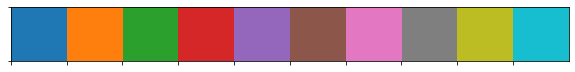

In [83]:
current_palette = sns.color_palette()
sns.palplot(current_palette)

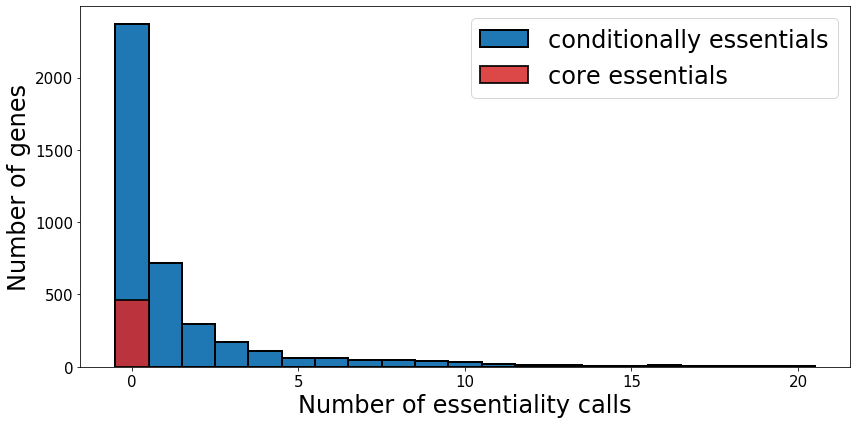

In [95]:
num_ES = df_mbio_ES.shape[0]
plt.figure(figsize = (12,6))
hist = plt.hist(df_tn['sum_all'].values, bins = np.arange(-0.5, 21), color=current_palette[0], edgecolor='black', linewidth=2)
plt.bar(0, num_ES, color = current_palette[3], width=1, edgecolor='k', linewidth=2, alpha=0.85)
# sns.distplot(df_tn['sum_all'].values, bins = np.arange(-0.5, 21))
plt.xlabel('Number of essentiality calls', fontsize = 24)
plt.ylabel('Number of genes', fontsize = 24)
plt.xticks(fontsize = 15)
yt = plt.yticks(fontsize = 15)
plt.legend(['conditionally essentials', 'core essentials'], fontsize = 24)
plt.tight_layout()
out_file = os.path.join(dir_figs, 'gene_stats.png')
plt.savefig(out_file, dpi = 300)

Which have 1 or more conditional essentiality calls?

In [71]:
rvid_ES_CES = df_tn_mbio[df_tn_mbio.sum_all>0].Rv_ID.values

In [67]:
def essentiality_calls(df, gene_id):
# Return the columns in which a given gene is called essential:
    cols = df.columns[1:]
    col_list = []
    for col in cols:
        if df[df['Rv_ID']==gene_id][col].values[0] == 1:
            col_list.append(col)
            
    return col_list

In [73]:
CES_list = []
for gene_id in rvid_ES_CES:
    CES_list.append(essentiality_calls(df_tn, gene_id))
df_ES_CES = pd.DataFrame()
df_ES_CES['Rv_ID'] = rvid_ES_CES
df_ES_CES['CES_calls'] = ['; '.join(CES[:-1]) for CES in CES_list]

In [75]:
file_out = '../../dep/data/ES_with_CES_calls.csv'
df_ES_CES.to_csv(file_out, index = False)

In [77]:
df_ES_CES[df_ES_CES.CES_calls.str.contains('carey')].shape

(105, 2)

### Which genes are the tail of the distribution?

In [102]:
df_tn_top_wName = df_tn_top.merge(df_mbio, how = 'left', on = 'Rv_ID')[['Rv_ID', 'sum_all', 'Name']]
file_out = '../../data/top_genes_CES_calls.xlsx'
df_tn_top_wName.to_excel(file_out, index= False)

### Cumulative distribution:

In [50]:
myrange = np.arange(df_tn['sum_all'].max())
cdf = np.zeros(len(myrange))
for n in myrange:
    cdf[int(n)] = df_tn[df_tn.sum_all<=n].shape[0] / df_tn.shape[0]

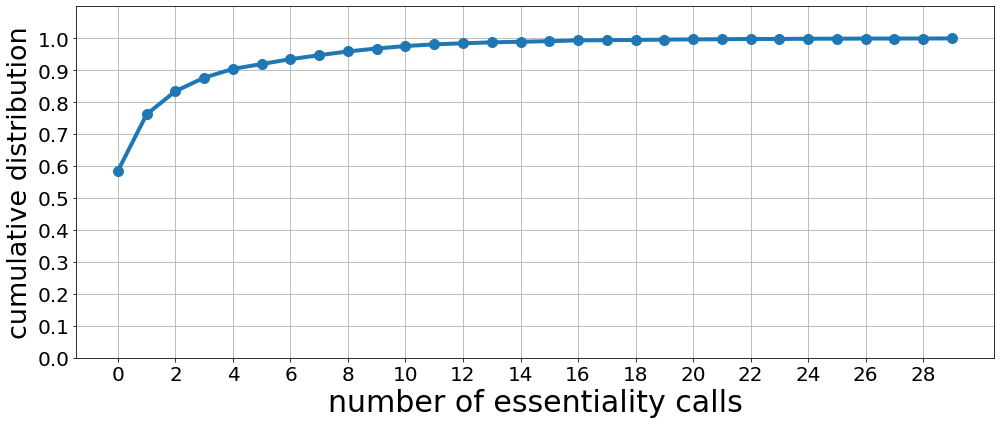

In [51]:
plt.figure(figsize = (14,6))
plt.plot(myrange, cdf, '-o', lw = 4, ms = 10)
xt = plt.xticks( np.arange(0, df_tn['sum_all'].max(), 2), fontsize = 20)
plt.ylim(0, 1.1)
yt = plt.yticks(np.arange(0, 1.1, 0.1), fontsize = 20)
plt.xlabel('number of essentiality calls', fontsize = 30)
plt.ylabel('cumulative distribution', fontsize = 27)
plt.grid(True, xdata = myrange)
plt.tight_layout()
